## Classification Model

In this project, we will try to classify a somewhat difficult classification by using polynomial features in the preprocessing step of our model.
The sample data has been generated by [this website](https://drawdata.xyz/).

### The steps in the project are as follows:
1. [Loading and plotting the sample data](#load)
2. [Scaling and plotting the sample data](#scale)
3. [Satarting with the model](#modeling)
4. [Cross-validation step](#cv)
5. [Picking the best model](#best)

In [1]:
## the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
## sklearn related packages
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier

<a id='load'></a>

In [2]:
sample_data = pd.read_csv('C:\\Users\\12145\\Projects\\data\\data.csv')
sample_data.head()

,x,y,z
0,141.754779,429.256350,a
1,67.476307,481.433972,a
2,53.556330,429.761504,a
3,109.312880,484.063451,a
4,95.094396,473.213174,a


In [3]:
X = sample_data[['x', 'y']].to_numpy()
y = sample_data['z'] == 'a'

<AxesSubplot:>

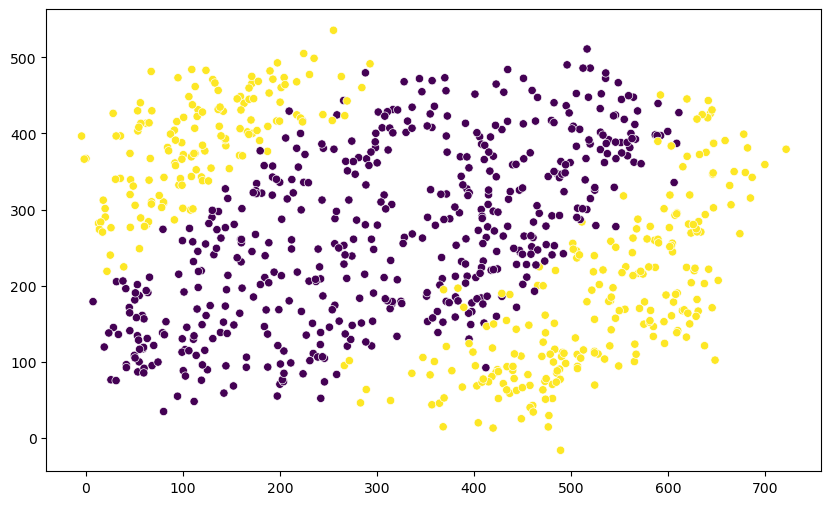

In [14]:
## plotting the data
## showing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = X[:,0], y=X[:, 1], c=y)

<a id='scale'></a>

<AxesSubplot:>

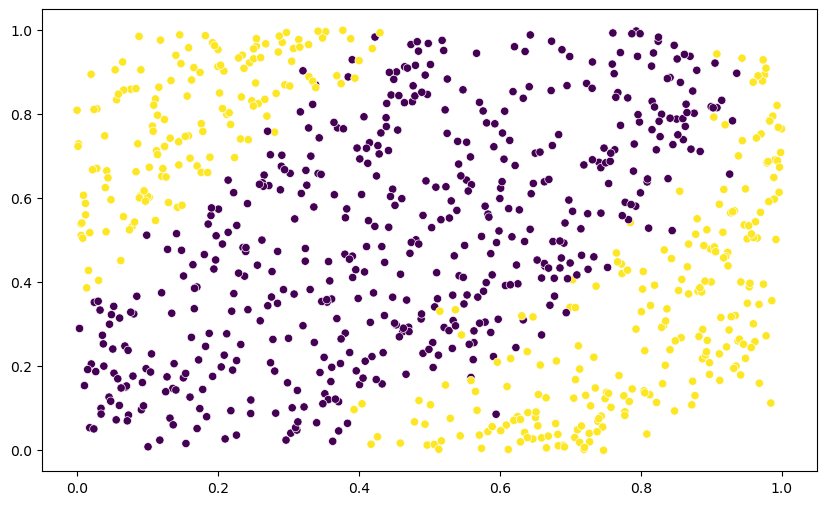

In [15]:
## first trying to scale the data
X_scaled = QuantileTransformer(n_quantiles=500).fit_transform(X)
## and plotting again
plt.figure(figsize =(10,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], c=y)

<a id='modeling'></a>

In [6]:
random_seed = 60 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_seed)

In [7]:
## starting with the pipeline
pipe = Pipeline(
    [('scale',QuantileTransformer(random_state=random_seed)),
     ('transform', PolynomialFeatures()),
     ('model', KNeighborsClassifier())
    ]
)
pipe.get_params()

{'memory': None,
 'steps': [('scale', QuantileTransformer(random_state=60)),
  ('transform', PolynomialFeatures()),
  ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': QuantileTransformer(random_state=60),
 'transform': PolynomialFeatures(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__ignore_implicit_zeros': False,
 'scale__n_quantiles': 1000,
 'scale__output_distribution': 'uniform',
 'scale__random_state': 60,
 'scale__subsample': 100000,
 'transform__degree': 2,
 'transform__include_bias': True,
 'transform__interaction_only': False,
 'transform__order': 'C',
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

<a id='cv'></a>

In [8]:
## moving to the cross-validation
grid_param = {
    'scale__n_quantiles':[100, 200, 300],
    'scale__subsample': [500, 700, 1000],
    'transform__degree':[2, 3],
    'model__algorithm':['auto', 'kd_tree', 'brute'],
    'model__n_neighbors':[5, 7, 9],
    'model__weights':['uniform', 'distance']
}
cv_model = GridSearchCV(estimator=pipe,
                       param_grid=grid_param,
                       cv=5, scoring={'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score)},
                       refit='precision')
cv_model.fit(X_train, y_train)
cv_model.best_estimator_

Pipeline(steps=[('scale',
                 QuantileTransformer(n_quantiles=200, random_state=60,
                                     subsample=500)),
                ('transform', PolynomialFeatures(degree=3)),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [9]:
pd.DataFrame(cv_model.cv_results_).sort_values('rank_test_precision')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__n_neighbors,param_model__weights,param_scale__n_quantiles,param_scale__subsample,param_transform__degree,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
295,0.002958,0.000174,0.009310,0.000987,brute,9,uniform,200,500,3,...,0.026326,1,0.934426,0.966667,0.901639,0.967213,0.901639,0.934317,0.029204,196
187,0.003281,0.000368,0.010055,0.003472,kd_tree,9,uniform,200,500,3,...,0.026326,1,0.934426,0.966667,0.901639,0.967213,0.901639,0.934317,0.029204,196
85,0.004190,0.000978,0.009175,0.000398,auto,9,uniform,300,500,3,...,0.026326,1,0.934426,0.966667,0.901639,0.967213,0.901639,0.934317,0.029204,196
301,0.002997,0.000631,0.011803,0.003572,brute,9,uniform,300,500,3,...,0.026326,1,0.934426,0.966667,0.901639,0.967213,0.901639,0.934317,0.029204,196
79,0.004759,0.001491,0.009522,0.002088,auto,9,uniform,200,500,3,...,0.026326,1,0.934426,0.966667,0.901639,0.967213,0.901639,0.934317,0.029204,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.003537,0.000945,0.004607,0.000809,auto,5,distance,100,500,3,...,0.035420,319,0.918033,0.966667,0.918033,0.967213,0.918033,0.937596,0.023960,139
127,0.005737,0.001911,0.008291,0.001836,kd_tree,5,distance,100,500,3,...,0.035420,319,0.918033,0.966667,0.918033,0.967213,0.918033,0.937596,0.023960,139
31,0.006486,0.001330,0.008041,0.002997,auto,5,distance,300,500,3,...,0.033791,322,0.918033,0.966667,0.918033,0.967213,0.918033,0.937596,0.023960,139
247,0.004361,0.000936,0.006207,0.001140,brute,5,distance,300,500,3,...,0.033791,322,0.918033,0.966667,0.918033,0.967213,0.918033,0.937596,0.023960,139


In [10]:
## the second try
## moving to the cross-validation
grid_param_2 = {
    'scale__n_quantiles':[50, 70, 100],
    'scale__subsample': [100, 300, 500],
    'transform__degree':[2],
    'model__algorithm':['auto'],
    'model__n_neighbors':[9, 11, 15],
    'model__weights':['uniform']
}
cv_model_2 = GridSearchCV(estimator=pipe,
                       param_grid=grid_param_2,
                       cv=5, scoring={'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score)},
                       refit='precision')
cv_model_2.fit(X_train, y_train)
cv_model_2.best_estimator_

Pipeline(steps=[('scale',
                 QuantileTransformer(n_quantiles=50, random_state=60,
                                     subsample=500)),
                ('transform', PolynomialFeatures()),
                ('model', KNeighborsClassifier(n_neighbors=11))])

In [11]:
## the second try
## moving to the cross-validation
grid_param_3 = {
    'scale__n_quantiles':[100, 150],
    'scale__subsample': [300],
    'transform__degree':[2],
    'model__algorithm':['auto'],
    'model__n_neighbors':[11],
    'model__weights':['uniform']
}
cv_model_3 = GridSearchCV(estimator=pipe,
                       param_grid=grid_param_3,
                       cv=5, scoring={'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score)},
                       refit='precision')
cv_model_3.fit(X_train, y_train)
cv_model_3.best_estimator_

Pipeline(steps=[('scale',
                 QuantileTransformer(n_quantiles=150, random_state=60,
                                     subsample=300)),
                ('transform', PolynomialFeatures()),
                ('model', KNeighborsClassifier(n_neighbors=11))])

<a id='best'></a>

In [12]:
cv_model_3.score(X_test, y_test)

0.9705882352941176

<AxesSubplot:>

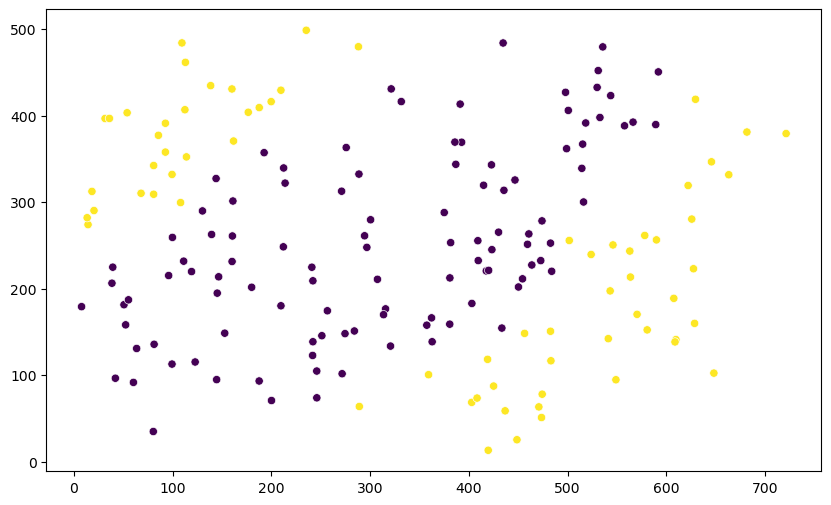

In [17]:
## plotting the predictions
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], c=cv_model_3.predict(X_test))